<a href="https://colab.research.google.com/github/JessicaaaJe/Jesscia_Data_Mining_Project/blob/main/classification!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part A**

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def calculate_gini(data_array):
    # If data is empty, return 0
    if len(data_array) == 0:
        return 0

    # Count the occurrences of each class label
    labels, counts = np.unique(data_array[:, 0], return_counts=True)

    # Calculate proportions
    proportions = counts / len(data_array)

    # Gini calculation: 1- THE SQUARE OF EACH CLASS SUCCESS RATE.
    gini = 1 - np.sum(proportions ** 2)
    return gini

In [ ]:
def calculate_entropy(data_array):
    # If data is empty, return 0
    if len(data_array) == 0:
        return 0
    # data_array[:,0] collects all the classes in the first columns.
    # np.uniue countes how many unique class are in the array.
    # return_counts return the counts of that class occured.

    labels, counts = np.unique(data_array[:, 0], return_counts=True)
    proportions = counts / len(data_array)
    # entropy = -p*log(p)
    entropy = -np.sum(proportions * np.log2(proportions))
    return entropy

In [ ]:
def gini_for_split(df, feature):
    data_array = df.values
    threshold = df[feature].mean()

    # split on the mean
    # df.columns.get_loc returns the specific column index.


    child1 = data_array[data_array[:, df.columns.get_loc(feature)] < threshold]
    child2 = data_array[data_array[:, df.columns.get_loc(feature)] >= threshold]

    return calculate_gini(child1), calculate_gini(child2)


In [ ]:
def entropy_for_split(df, feature):
    data_array = df.values
    threshold = df[feature].mean()

    child1 = data_array[data_array[:, df.columns.get_loc(feature)] < threshold]
    child2 = data_array[data_array[:, df.columns.get_loc(feature)] >= threshold]

    return calculate_entropy(child1), calculate_entropy(child2)


In [ ]:
def combined_gini(df, feature):
    # Get the individual gini values for each child node
    gini_child1, gini_child2 = gini_for_split(df, feature)

    data_array = df.values
    threshold = df[feature].mean()

    # Get the number of samples in each child node
    num_samples_child1 = np.sum(data_array[:, df.columns.get_loc(feature)] < threshold)
    num_samples_child2 = np.sum(data_array[:, df.columns.get_loc(feature)] >= threshold)

    total_samples = len(df)

    # Calculate weighted average of the two gini values
    # num_samples_child1/total_samples calcualte the weighted proportion.
    combined = (num_samples_child1 / total_samples) * gini_child1 + (num_samples_child2 / total_samples) * gini_child2

    return combined

In [ ]:
def combined_entropy(df, feature):
    # Get the individual entropy values for each child node
    entropy_child1, entropy_child2 = entropy_for_split(df, feature)

    data_array = df.values
    threshold = df[feature].mean()

    # Get the number of samples in each child node
    num_samples_child1 = np.sum(data_array[:, df.columns.get_loc(feature)] < threshold)
    num_samples_child2 = np.sum(data_array[:, df.columns.get_loc(feature)] >= threshold)

    total_samples = len(df)

    # Calculate weighted average of the two entropy values
    combined = (num_samples_child1 / total_samples) * entropy_child1 + (num_samples_child2 / total_samples) * entropy_child2

    return combined


In [ ]:
def scale_column(data):
    """Scale a column to [0, 1] range."""
    min_val, max_val = data.min(), data.max()
    return (data - min_val) / (max_val - min_val)

***Above Are the defined functions. ***


**We then perform impurity calculations.

**The combined Gini index and Entropy Index are both minimized when split on attribute F23. Therefore, we may choose F23 to split. **

In [ ]:
# scaling is not necessary in decision tree because trees are not senstive to the magnitude.

file_path = '/content/drive/MyDrive/share_folders_csc373/Data/Classification_I.dat'
df = pd.read_csv(file_path)


# Separate the target and feature columns; the first column is the target class indicator ("M" or "B")
# The rest are feature columns
target_col = df.columns[0]
feature_cols = df.columns[1:]


scaled_features = scale_column(df[feature_cols])

# Calculate mean values for each scaled feature
mean_values = scaled_features.mean()

# Print scaled features and mean values
print("Scaled Features:")
print(scaled_features.round(4))
print("\nMean Values for Each Scaled Feature:")
print(mean_values.round(4))



Scaled Features:
        F00     F01     F02     F03     F04     F05     F06     F07     F08  \
0    0.5210  0.0227  0.5460  0.3637  0.5938  0.7920  0.7031  0.7311  0.6864   
1    0.6431  0.2726  0.6158  0.5016  0.2899  0.1818  0.2036  0.3488  0.3798   
2    0.6015  0.3903  0.5957  0.4494  0.5143  0.4310  0.4625  0.6357  0.5096   
3    0.2101  0.3608  0.2335  0.1029  0.8113  0.8114  0.5656  0.5229  0.7763   
4    0.6299  0.1566  0.6310  0.4893  0.4304  0.3479  0.4639  0.5184  0.3783   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
564  0.6900  0.4288  0.6787  0.5665  0.5269  0.2961  0.5715  0.6904  0.3364   
565  0.6223  0.6270  0.6040  0.4740  0.4078  0.2577  0.3374  0.4866  0.3495   
566  0.4553  0.6212  0.4458  0.3031  0.2882  0.2543  0.2168  0.2635  0.2677   
567  0.6446  0.6635  0.6655  0.4757  0.5883  0.7902  0.8233  0.7555  0.6753   
568  0.0369  0.5015  0.0285  0.0159  0.0000  0.0744  0.0000  0.0000  0.2662   

        F09  ...     F20     F21  

In [ ]:
# Calculate the number of each class
num_B = df[df[target_col] == 'B'].shape[0]
num_M = df[df[target_col] == 'M'].shape[0]
total_observations = df.shape[0]

# Calculate proportions for each class
p_B = num_B / total_observations
p_M = num_M / total_observations

# Calculate Gini index for the root
gini_root = 1 - (p_B**2 + p_M**2)

# Calculate Entropy for the root
# the condition is set for log. the number in log has to be non-negative.
entropy_root = - (p_B * np.log2(p_B) if p_B > 0 else 0) - (p_M * np.log2(p_M) if p_M > 0 else 0)

# Print the results
print(f'Number of class "B" observations: {num_B}')
print(f'Number of class "M" observations: {num_M}')
print(f'Total number of observations: {total_observations}')
print(f'Gini index for the root: {gini_root:.4f}')
print(f'Entropy for the root: {entropy_root:.4f}')


Number of class "B" observations: 357
Number of class "M" observations: 212
Total number of observations: 569
Gini index for the root: 0.4675
Entropy for the root: 0.9526


In [ ]:
# Update the write_detailed_output function
def write_detailed_output(df, output_filename="/content/drive/MyDrive/Chen_Jessica_CSC_373/Classification I/DecTreeAssign_A_out.csv"):
    with open(output_filename, 'w') as f:
        # Write the header
        f.write("Feature Name,Feature Mean (Scaled),Child 1 B Count,Child 1 M Count,Child 1 Gini,Child 1 Entropy,Child 2 B Count,Child 2 M Count,Child 2 Gini,Child 2 Entropy,Combined Gini,Combined Entropy\n")

        # For each feature
        for feature in df.columns:
            if feature == df.columns[0]:  # skip the class label column
                continue

            # Scaled feature and its mean
            scaled_column = scale_column(df[feature])
            scaled_mean_val = scaled_column.mean()

            # Split data based on the original mean (unscaled mean)
            unscaled_mean_val = df[feature].mean()
            child1_data = df[df[feature] < unscaled_mean_val]
            child2_data = df[df[feature] >= unscaled_mean_val]

            # Child 1 class counts
            child1_b_count = len(child1_data[child1_data[df.columns[0]] == "B"])
            child1_m_count = len(child1_data[child1_data[df.columns[0]] == "M"])

            # Child 2 class counts
            child2_b_count = len(child2_data[child2_data[df.columns[0]] == "B"])
            child2_m_count = len(child2_data[child2_data[df.columns[0]] == "M"])

            # Child impurities
            gini_child1, gini_child2 = gini_for_split(df, feature)
            entropy_child1, entropy_child2 = entropy_for_split(df, feature)

            # Combined impurities
            combined_gini_val = combined_gini(df, feature)
            combined_entropy_val = combined_entropy(df, feature)

            # Write to the file
            f.write(f"{feature},{scaled_mean_val:.4f},{child1_b_count},{child1_m_count},{gini_child1:.4f},{entropy_child1:.4f},{child2_b_count},{child2_m_count},{gini_child2:.4f},{entropy_child2:.4f},{combined_gini_val:.4f},{combined_entropy_val:.4f}\n")

    print(f"Output written to {output_filename}")

# Use the function

write_detailed_output(df)


Output written to /content/drive/MyDrive/Chen_Jessica_CSC_373/Classification I/DecTreeAssign_A_out.csv


**Part2**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# calcualting required statistics
def classify_stats(predicted, actual):
    TP = np.sum((predicted == 'M') & (actual == 'M'))
    TN = np.sum((predicted == 'B') & (actual == 'B'))
    FP = np.sum((predicted == 'M') & (actual == 'B'))
    FN = np.sum((predicted == 'B') & (actual == 'M'))

    prev = np.sum(actual == 'M') / len(actual)
    accur = np.sum(predicted == actual) / len(actual)
    sens = TP / (TP + FN)
    spec = TN / (TN + FP)
    prec = TP / (TP + FP)
    ppv = prec
    f1Score = 2 * (prec * sens) / (prec + sens)

    return prev, accur, sens, spec, prec, ppv, f1Score


In [ ]:
# set the training and testing data.
X = df.drop(columns=[df.columns[0]])
y = df[df.columns[0]]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
# fit decision tree and train using the training data.
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Print tree parameters
print(clf.get_params())


{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
# use testing data to test the fitted model.
predicted_classes = clf.predict(X_test)
stats = classify_stats(predicted_classes, y_test.values)
labels = ["Prevalence:", "Accuracy:", "Sensitivity:", "Specificity:", "Precision:", "PPV:", "F1 Score:"]
for label, stat in zip(labels, stats):
    print(f"{label:14s} {stat:.3f}")


Prevalence:    0.377
Accuracy:      0.947
Sensitivity:   0.930
Specificity:   0.958
Precision:     0.930
PPV:           0.930
F1 Score:      0.930


**Trying with different decision tree parameters using decreasing impurity. From the plot, we see that as the impurity decreaes, the accuracy increases over time. **

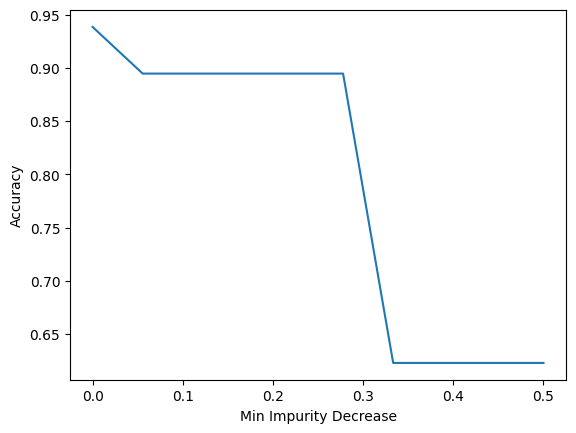

In [ ]:
# Try with different parameter.
# Loop on `min_impurity_decrease`
# linspace creates an array of 10 equally spaced values between 0 and 0.5
impurity_values = np.linspace(0, 0.5, 10)
accuracies = []

for impurity in impurity_values:
    clf = DecisionTreeClassifier(min_impurity_decrease=impurity)
    clf.fit(X_train, y_train)
    accuracies.append(clf.score(X_test, y_test))

plt.plot(impurity_values, accuracies)
plt.xlabel('Min Impurity Decrease')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# visualize two to three features.
importances = clf.feature_importances_

# np.argsort provides the indices of features in ascending order of importance.
#[-3:]] selects the last three indices.
#[::-1] reverse the order and make the three indices in descending order.
top_indices = np.argsort(importances)[-3:][::-1]

# extract the top indices.
top_features = X.columns[top_indices]


In [ ]:
# The original data points apperas too dense on the graph. So we choose a sample size of 0.2.
sample_fraction = 0.20
X_sample = X.sample(frac=sample_fraction)
y_sample = y.loc[X_sample.index]


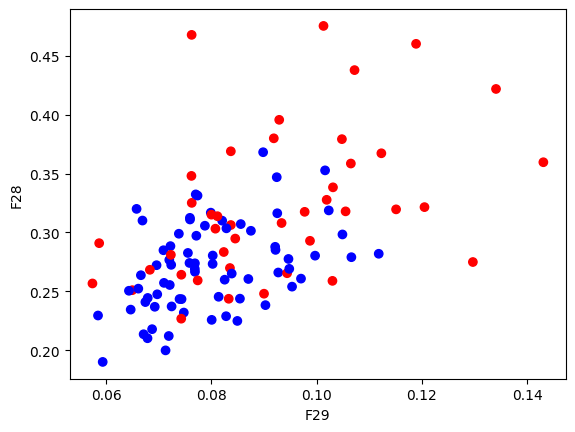

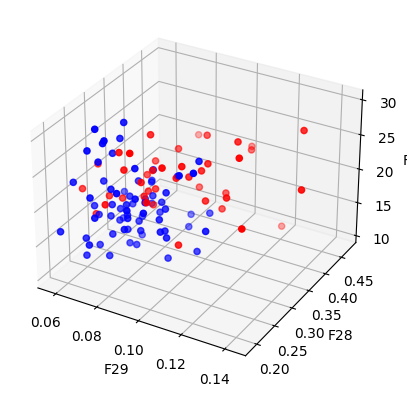

In [ ]:
# 2D Plot for the top 2 features using sub-sampled data
# top_features[0][1] chooses the top 2 features.
plt.scatter(X_sample[top_features[0]], X_sample[top_features[1]], c=y_sample.map({'M': 'r', 'B': 'b'}))
plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.show()

# 3D Plot for the top 3 features using sub-sampled data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_sample[top_features[0]], X_sample[top_features[1]], X_sample[top_features[2]], c=y_sample.map({'M': 'r', 'B': 'b'}))
ax.set_xlabel(top_features[0])
ax.set_ylabel(top_features[1])
ax.set_zlabel(top_features[2])
plt.show()
